<a href="https://colab.research.google.com/github/apoorva1823000/Parkinson-s-Disease-Predictor/blob/main/ParkinsonsPredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [7]:
prk_data = pd.read_csv('/content/parkinsons.csv')

In [19]:
import pandas as pd
import numpy as np

# Load your CSV file into a DataFrame
parkinsons_data = pd.read_csv('/content/augmented_dataset.csv')

# Exclude the 'status' column from augmentation
status_column = parkinsons_data['status']
data_to_augment = parkinsons_data.drop(columns=['status'])

# Duplicate the dataset excluding 'status' column
multiplied_data = pd.concat([data_to_augment] * 3, ignore_index=True)

# Add noise to the duplicated data (example: adding random noise to numerical columns)
numeric_columns = multiplied_data.select_dtypes(include=[np.number]).columns
multiplied_data[numeric_columns] += np.random.normal(0, 0.1, size=(len(multiplied_data), len(numeric_columns)))

# Combine 'status' column back with augmented data
multiplied_data['status'] = status_column.repeat(3).reset_index(drop=True)

# Save the augmented dataset to a new CSV file
multiplied_data.to_csv('new_augmented_dataset.csv', index=False)


In [21]:
prk_data = pd.read_csv('/content/new_augmented_dataset.csv')

In [22]:
prk_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,120.208668,157.184659,75.193779,-0.154717,0.063154,0.043406,-0.057776,0.312818,0.340799,...,0.065477,-0.217768,21.039633,0.393560,0.879150,-4.972522,0.064603,2.393729,0.339003,1
1,phon_R01_S01_2,122.402574,148.521480,113.659659,-0.040228,0.142709,0.192527,-0.023867,0.001307,0.026253,...,0.101673,0.237453,19.133247,0.364156,0.814099,-4.055959,0.293244,2.305516,0.493960,1
2,phon_R01_S01_3,116.584222,131.177121,111.679397,-0.134293,0.062033,-0.007591,-0.065875,0.136913,0.070668,...,0.214917,0.096253,20.607985,0.387754,0.688570,-4.511608,0.437913,2.143681,0.474788,1
3,phon_R01_S01_4,116.704651,137.745722,111.523673,-0.034972,-0.245905,0.046487,0.093757,0.055105,0.094321,...,-0.016707,0.154382,20.748787,0.452671,0.709318,-4.095292,0.183904,2.555184,0.319797,1
4,phon_R01_S01_5,116.073568,141.876477,110.708582,0.058666,-0.243570,0.062431,-0.113160,-0.287716,-0.000806,...,0.034325,0.299190,19.507085,0.331416,0.837152,-3.708321,0.115370,2.205838,0.444828,1


In [9]:
prk_data.shape

(1755, 24)

In [10]:
prk_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,...,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000,1755.000000
mean,154.227725,197.111275,116.317105,0.005432,0.001198,-0.001490,0.006782,0.012519,0.023966,0.290815,...,0.040518,0.009851,21.889493,0.758290,0.497947,0.720162,-5.692863,0.220559,2.377842,0.204920
std,41.297345,91.282276,43.420134,0.145354,0.139385,0.137982,0.141093,0.138235,0.141214,0.244839,...,0.141629,0.144851,4.421954,0.453594,0.175288,0.154203,1.098726,0.164425,0.397959,0.161575
min,88.159002,101.807521,65.269472,-0.500241,-0.512527,-0.476427,-0.480600,-0.427382,-0.517369,-0.267327,...,-0.391391,-0.493039,8.279365,-0.459306,-0.130483,0.270231,-8.171601,-0.360735,1.260669,-0.487064
25%,117.333164,134.596187,84.262171,-0.094660,-0.088943,-0.089670,-0.084840,-0.079812,-0.067542,0.126217,...,-0.061753,-0.084924,19.194328,0.624486,0.374915,0.614499,-6.484900,0.107587,2.093383,0.096940
50%,148.786610,175.859130,104.266102,-0.000337,-0.002958,-0.002985,0.006564,0.012031,0.026469,0.256546,...,0.039847,0.009561,22.149405,0.945878,0.502556,0.718134,-5.730201,0.221556,2.362983,0.201613
75%,183.491289,224.370829,140.960636,0.104479,0.095942,0.091762,0.104169,0.103352,0.119183,0.415490,...,0.140963,0.103356,25.129307,1.062773,0.618946,0.824215,-5.040320,0.336355,2.610229,0.307037
max,260.322868,592.064268,239.322652,0.445797,0.549706,0.447376,0.605948,0.450412,0.446067,1.491761,...,0.573231,0.579871,33.349929,1.499619,1.017326,1.212944,-2.046442,0.808540,3.773882,0.842221


In [11]:
prk_data.info

<bound method DataFrame.info of                 name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0     phon_R01_S01_1   119.924170    157.414502     74.954317        0.005453   
1     phon_R01_S01_2   122.575563    148.580190    113.769668       -0.280627   
2     phon_R01_S01_3   116.587545    131.312019    111.564547       -0.013188   
3     phon_R01_S01_4   116.744015    138.058326    111.146157       -0.215403   
4     phon_R01_S01_5   115.962677    141.626124    110.730503        0.073079   
...              ...          ...           ...           ...             ...   
1750  phon_R01_S50_2   174.180713    230.836651     94.323139       -0.051623   
1751  phon_R01_S50_3   209.496315    253.147116     89.589303       -0.111615   
1752  phon_R01_S50_4   174.626855    239.758098     74.228471        0.268106   
1753  phon_R01_S50_5   199.037361    397.099113     74.960906        0.066679   
1754  phon_R01_S50_6   214.284514    260.122808     77.919472        0.105181

In [12]:
prk_data.shape

(1755, 24)

In [23]:
prk_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
status              0
dtype: int64

<ipython-input-14-d99fd1d26da9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(prk_data.corr(),cmap='YlGnBu')


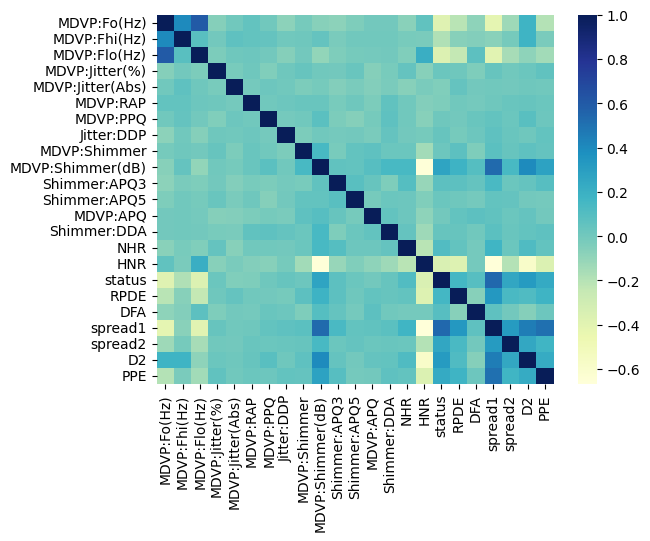

In [14]:
sns.heatmap(prk_data.corr(),cmap='YlGnBu')
plt.show()

In [15]:
prk_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [24]:
prk_data['status'].value_counts()

1    1323
0     432
Name: status, dtype: int64

1 -> With Parkinson

0 -> Without Parkinson

In [25]:
prk_data.groupby('status').mean()

<ipython-input-25-6f6827183aff>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prk_data.groupby('status').mean()


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,151.853711,198.866527,112.132946,0.013649,0.003641,0.000941,-0.009564,0.001039,0.027739,0.301657,...,0.027121,0.039574,0.035162,21.470770,0.499453,0.718286,-5.615134,0.206036,2.393364,0.217165
1,154.992496,196.527100,117.691963,0.003910,0.000236,-0.002730,0.000273,-0.000882,0.027293,0.286057,...,0.028714,0.042266,0.031267,22.027514,0.494252,0.711295,-5.708410,0.219165,2.386277,0.212587


In [26]:
X = prk_data.drop(columns=['name','status'],axis=1)
Y = prk_data['status']

In [27]:
print(X.shape)

(1755, 22)


In [28]:
print(Y.shape)

(1755,)


In [29]:
print(X)

      MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0      120.208668    157.184659     75.193779       -0.154717   
1      122.402574    148.521480    113.659659       -0.040228   
2      116.584222    131.177121    111.679397       -0.134293   
3      116.704651    137.745722    111.523673       -0.034972   
4      116.073568    141.876477    110.708582        0.058666   
...           ...           ...           ...             ...   
1750   174.091642    230.944045     94.310149       -0.092649   
1751   209.649382    252.958676     89.721803       -0.053104   
1752   174.876975    240.314334     74.113221       -0.176550   
1753   198.990164    397.004250     74.673822        0.015333   
1754   214.234133    260.444611     77.908511        0.175177   

      MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.063154  0.043406 -0.057776    0.312818      0.340799   
1             0.142709  0.192527 -0.023867    0.001307      0.026253   
2  

In [30]:
print(Y)

0       1
1       1
2       1
3       1
4       1
       ..
1750    0
1751    0
1752    0
1753    0
1754    0
Name: status, Length: 1755, dtype: int64


In [31]:
scaler = StandardScaler()

In [32]:
scaler.fit(X)

StandardScaler()

In [33]:
standardized_data = scaler.transform(X)

In [34]:
print(standardized_data)

[[-0.8240106  -0.43741656 -0.9474539  ... -0.95230647  0.01409828
   0.7582458 ]
 [-0.77085746 -0.53234589 -0.06136549 ...  0.48650555 -0.20380009
   1.69604232]
 [-0.9118223  -0.72240183 -0.10698222 ...  1.39689    -0.60355464
   1.5800168 ]
 ...
 [ 0.50047246  0.47350139 -0.97234532 ... -1.12542876  0.8466482
  -2.18052614]
 [ 1.08467769  2.19047739 -0.95943147 ... -1.50737541 -0.1744029
   1.26388166]
 [ 1.45400279  0.69408484 -0.88491815 ...  0.28095604 -0.01531743
  -1.76667377]]


In [35]:
X=standardized_data

In [36]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [37]:
print(X.shape,Y.shape,X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(1755, 22) (1755,) (1404, 22) (351, 22) (1404,) (351,)


In [38]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

In [39]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)

In [40]:
print('Accuracy score of the training data  =  ',training_data_accuracy)

Accuracy score of the training data  =   0.7535612535612536


In [41]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction,Y_test)

In [42]:
print('Accuracy score of the test data = ',test_data_accuracy)

Accuracy score of the test data =  0.7549857549857549


In [44]:
input_data = list(map(float, input('Enter the data: ').split(',')))
std_data = scaler.transform(np.array(input_data).reshape(1, -1))
prediction = classifier.predict(std_data)
print('Has Parkinsons' if prediction[0] == 1 else 'No Parkinsons')

Enter the data: 122.9451412675784,129.93693631753473,114.8640125192436,0.0352867091956653,-0.21143211170983853,-0.10108558736636594,0.11085963642502543,0.20242127547475103,0.022597552028729588,0.11721038133220721,0.08191912960455697,-0.028684588362384484,-0.1556095485274454,0.1907282312145972,0.016286049388078393,24.911245384834082,0.39932997411273896,0.7970411335133639,-6.449176706769033,0.01984623884185857,1.795062463557433,0.01088811213194249
Has Parkinsons


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Model Training using Naive Bayes

In [70]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [75]:
model.fit(X_train,Y_train)

GaussianNB()

In [76]:
model.score(X_test,Y_test)

0.6666666666666666

In [77]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)
print(training_data_accuracy)

0.7115384615384616


In [87]:
X_test_prediction = model.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction,Y_test)
print(testing_data_accuracy)

0.6666666666666666


In [80]:
input_data = list(map(float, input('Enter the data: ').split(',')))
std_data = np.array(input_data).reshape(1, -1)
prediction = model.predict(std_data)
print('Has Parkinsons' if prediction[0] == 1 else 'No Parkinsons')

Enter the data: 116.38800,129.03800,108.97000,0.00346,0.00003,0.00169,0.00213,0.00507,0.01725,0.15500,0.00874,0.01021,0.01331,0.02623,0.00415,26.14300,0.361232,0.763242,-6.016891,0.109256,2.004719,0.174429
No Parkinsons


Model Training using Logistic Regression

In [81]:
LRmodel = LogisticRegression()
LRmodel.fit(X_train,Y_train)

LogisticRegression()

In [84]:
X_train_prediction = LRmodel.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)
print(training_data_accuracy)

0.8717948717948718


In [86]:
X_test_prediction = LRmodel.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction,Y_test)
print(testing_data_accuracy)

0.8461538461538461


In [88]:
input_data = list(map(float, input('Enter the data: ').split(',')))
std_data = np.array(input_data).reshape(1, -1)
prediction = LRmodel.predict(std_data)
print('Has Parkinsons' if prediction[0] == 1 else 'No Parkinsons')

Enter the data: 116.38800,129.03800,108.97000,0.00346,0.00003,0.00169,0.00213,0.00507,0.01725,0.15500,0.00874,0.01021,0.01331,0.02623,0.00415,26.14300,0.361232,0.763242,-6.016891,0.109256,2.004719,0.174429
No Parkinsons


Model Training using KNN

In [89]:
scaler = StandardScaler()
scaler.fit(X)
X=scaler.transform(X)
print(X)

[[-0.82929965 -0.43616456 -0.95203729 ...  0.48047686 -0.21053082
   0.86888575]
 [-0.77097169 -0.53097409 -0.05772056 ...  1.31118546  0.27507712
   1.80360503]
 [-0.90947638 -0.7231683  -0.10987483 ...  1.01768236 -0.10362861
   1.40266141]
 ...
 [ 0.49557839  0.47010361 -0.96839309 ... -0.81807931  0.78033848
  -0.83241014]
 [ 1.07876114  2.19004398 -0.95417967 ... -0.22906571 -0.63700298
  -0.92610456]
 [ 1.45481664  0.69224632 -0.88348115 ... -0.43085284  0.45480231
  -0.64505466]]


In [91]:
from sklearn.neighbors import KNeighborsClassifier

In [92]:
KNNClassifier = KNeighborsClassifier(n_neighbors=5)
KNNClassifier.fit(X_train,Y_train)

KNeighborsClassifier()

In [93]:
X_train_prediction = KNNClassifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,Y_train)
print(training_data_accuracy)

0.9551282051282052


In [95]:
X_test_prediction = KNNClassifier.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction,Y_test)
print(testing_data_accuracy)

0.9487179487179487


In [96]:
from sklearn.metrics import classification_report,confusion_matrix

In [98]:
print(classification_report(Y_test,KNNClassifier.predict(X_test)))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.97      0.97      0.97        29

    accuracy                           0.95        39
   macro avg       0.93      0.93      0.93        39
weighted avg       0.95      0.95      0.95        39



In [99]:
print(confusion_matrix(Y_test,KNNClassifier.predict(X_test)))

[[ 9  1]
 [ 1 28]]


In [6]:
parkinsons_data = pd.read_csv('/content/augmented_dataset.csv')

# Duplicate the dataset to increase size (example: replicating 3 times)
multiplied_data = pd.concat([parkinsons_data] * 3, ignore_index=True)

# Add noise to the duplicated data (example: adding random noise to numerical columns)
numeric_columns = multiplied_data.select_dtypes(include=[np.number]).columns
multiplied_data[numeric_columns] += np.random.normal(0, 0.1, size=(len(multiplied_data), len(numeric_columns)))

# Save the augmented dataset to a new CSV file
multiplied_data.to_csv('new_augmented_dataset.csv', index=False)
new_parkinsons_data = pd.read_csv('/content/new_augmented_dataset.csv')
print(new_parkinsons_data.shape)

(1755, 24)
